# Exercise for UML

# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv

# Part 1

## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



## Exercises Part 1

In [2]:
!pip install pygwalker -q

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pw

In [4]:
# Import the dataset. How are you doing it?
df = pd.read_csv("https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv")

In [5]:
# Understand the dataset. What columns are available?
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
# Check for missing values. How would you handle them?
# Are there any outliers or unusual values in the dataset?
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
#Handling missing values
df.fillna(method='ffill', inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
#  What are the distributions of song popularity, duration_ms, and danceability? Use appropriate visualizations.
#  How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)
df['track_genre'].nunique()

114

In [12]:
df['track_genre'].value_counts().head(20)

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
Name: track_genre, dtype: int64

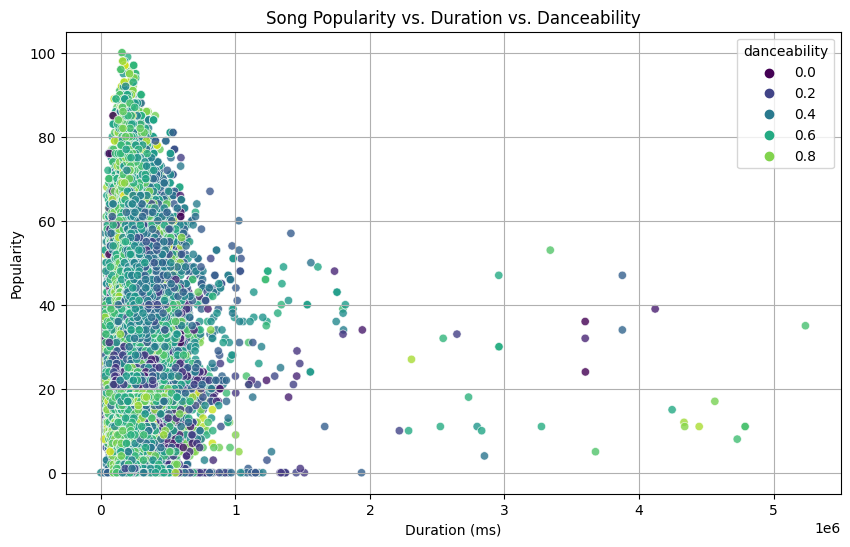

In [13]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], hue=df['danceability'], palette="viridis", alpha=0.8)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Song Popularity vs. Duration vs. Danceability')
plt.grid(True)
plt.show()

In [14]:
#   Visualize the number of songs by genre. Which are the most common genres?
#   Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
#   Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?

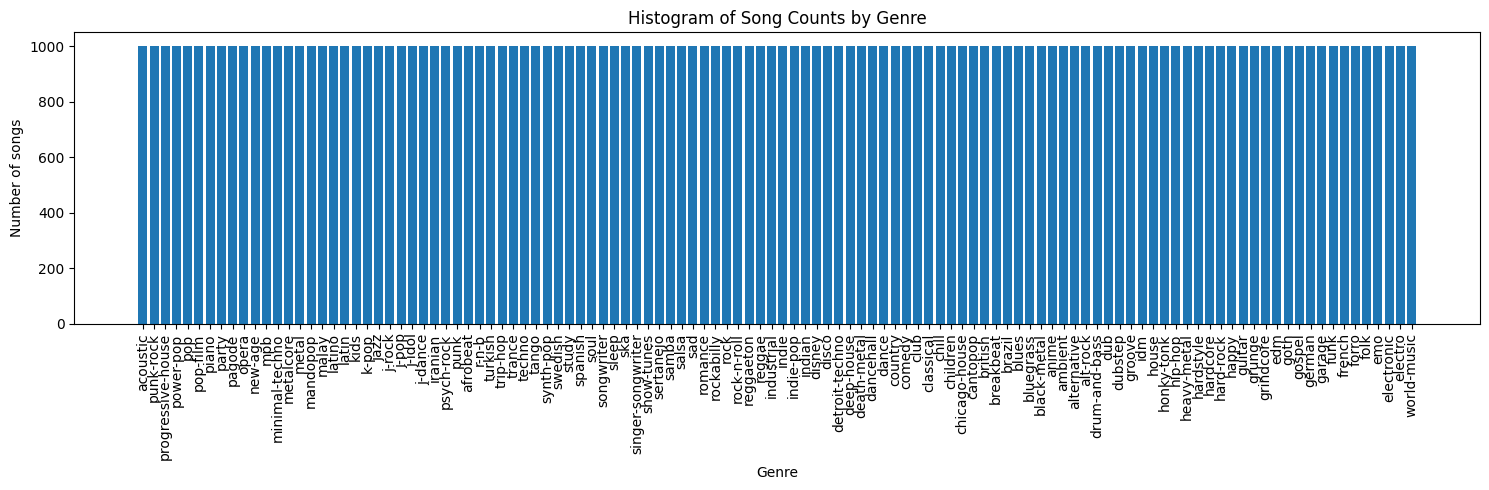

In [15]:
gen_counts = df['track_genre'].value_counts()

plt.figure(figsize=(15,5))
plt.bar(gen_counts.index, gen_counts.values)

plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.title('Histogram of Song Counts by Genre')

# Rotate x-axis labels for better readability (optional)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity',ascending=False)


,track_genre,popularity
81,pop-film,59.283
65,k-pop,56.896
15,chill,53.651
94,sad,52.379
44,grunge,49.594
...,...,...
13,chicago-house,12.339
24,detroit-techno,11.174
67,latin,8.297
93,romance,3.245


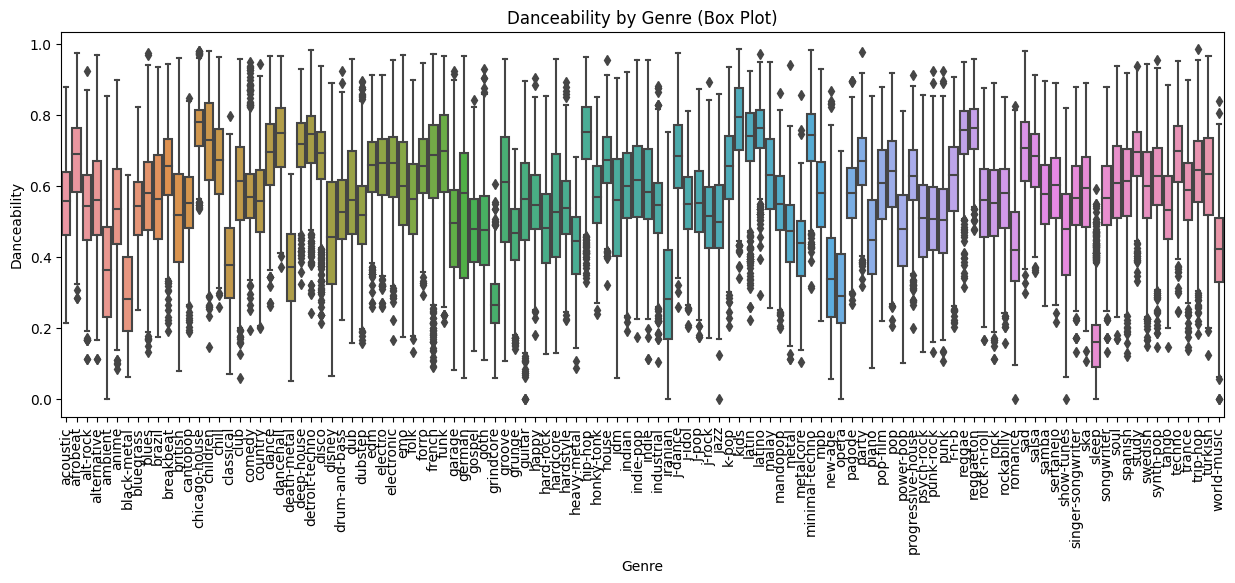

In [17]:
#Box plot for danceability and genre

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x=df['track_genre'], y=df['danceability'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Danceability by Genre (Box Plot)')
plt.show()

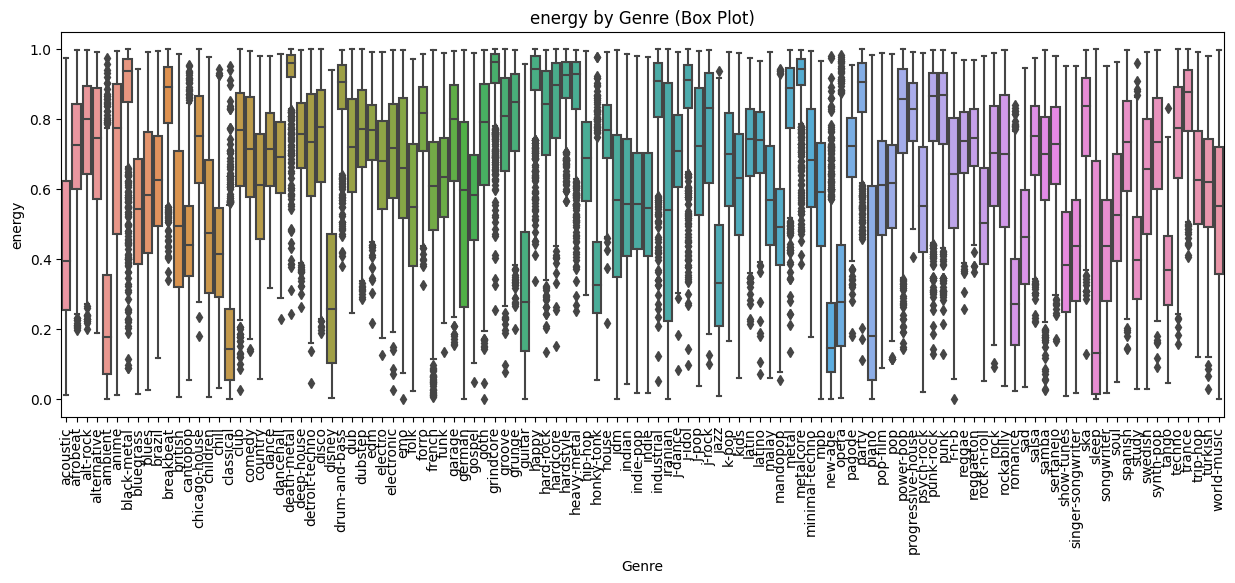

In [18]:
#Box plot for energy and genre

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x=df['track_genre'], y=df['energy'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('energy')
plt.title('energy by Genre (Box Plot)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


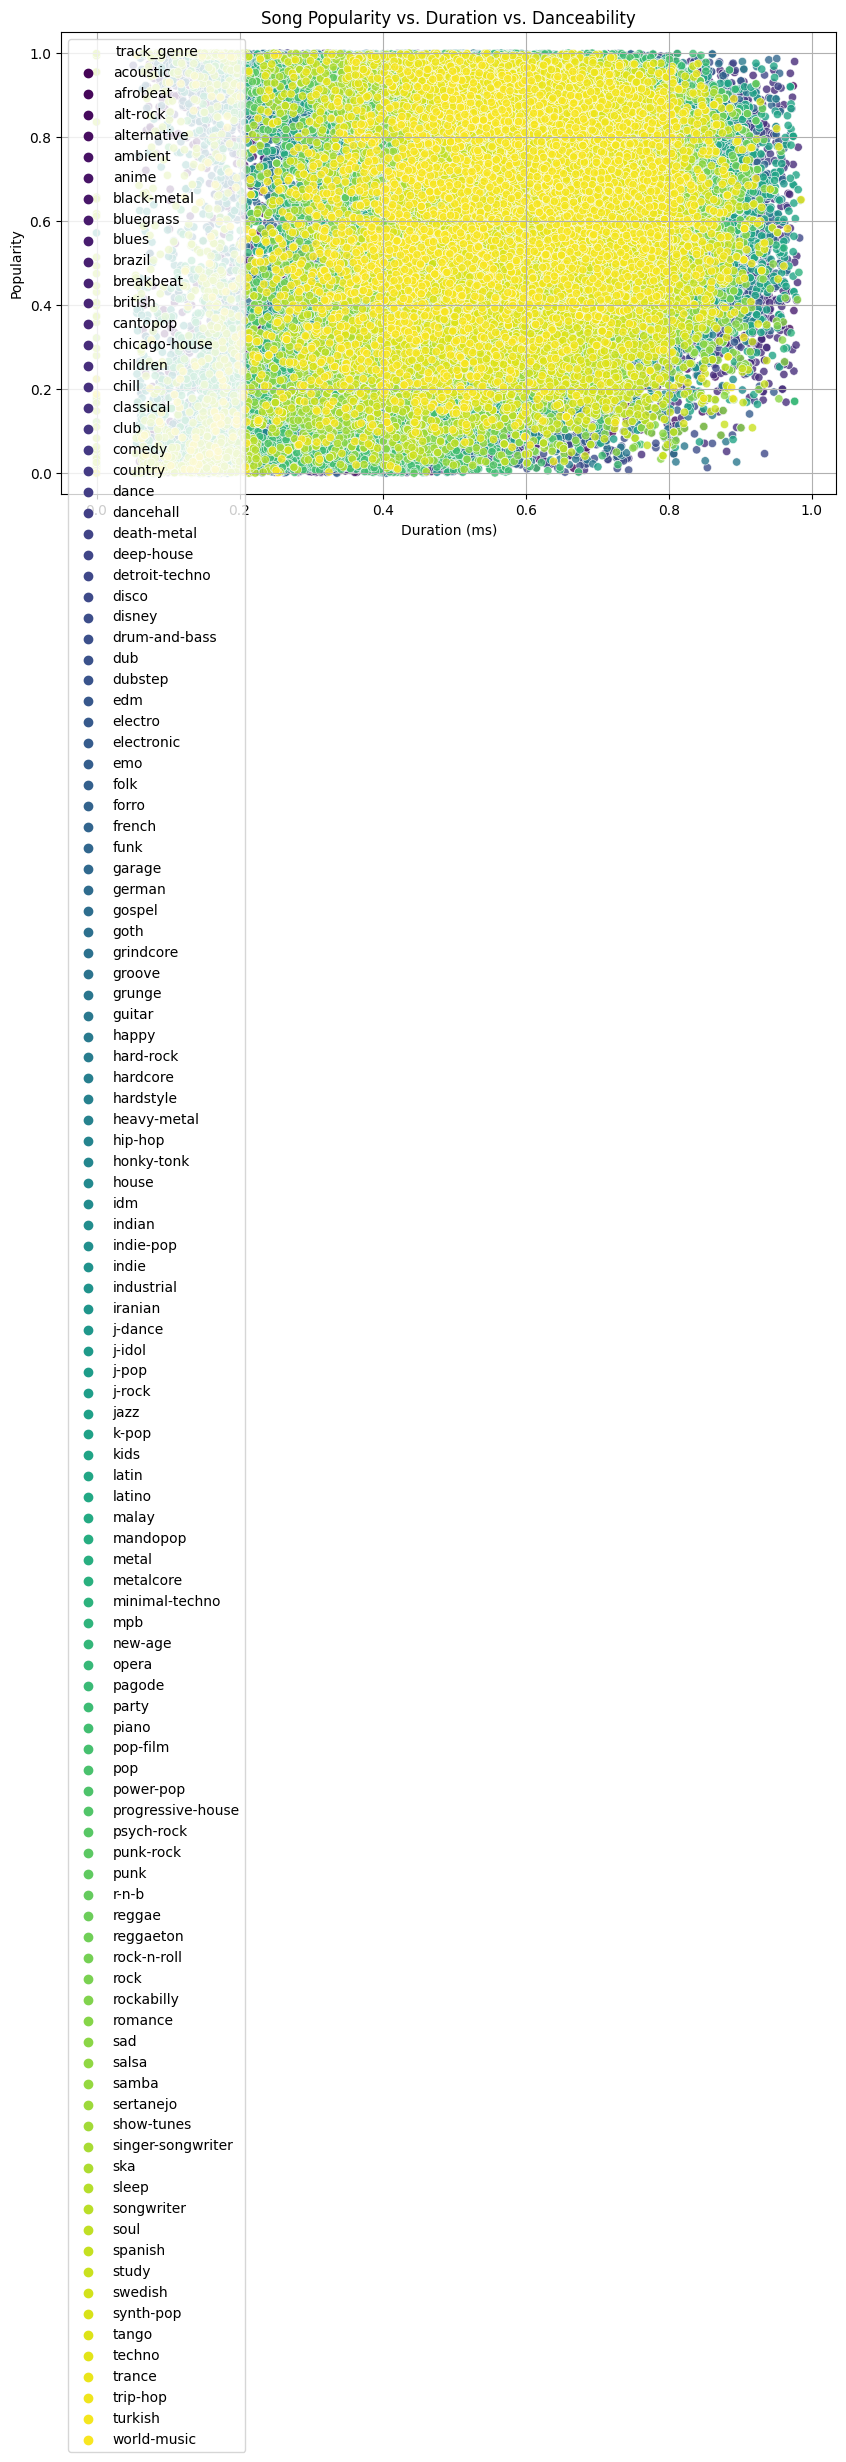

In [19]:
 # Investigate the relationship between danceability and energy. Do songs that are more danceable tend to have more energy? Use a scatter plot.
 # How does song popularity relate to other characteristics like danceability, loudness, or tempo?

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'], hue=df['track_genre'], palette="viridis", alpha=0.8)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Song Popularity vs. Duration vs. Danceability')
plt.grid(True)
plt.show()

In [20]:
new_data = df.loc[:, ['popularity', 'danceability','loudness','tempo']]

In [21]:
corr_matrix = new_data.corr()

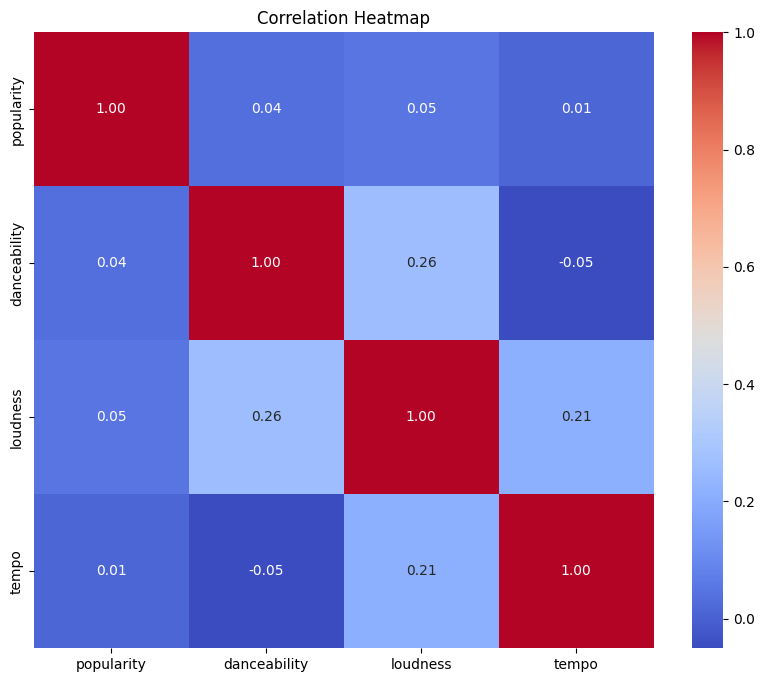

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
 #  Are there any trends related to tempo or time_signature?

In [24]:
tempo_time = df.loc[:, ['tempo', 'time_signature']]

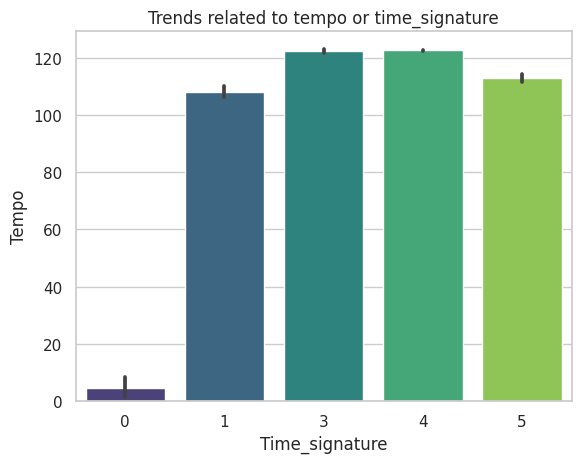

In [25]:
# Create a barplot using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x='time_signature', y='tempo', data=tempo_time, palette="viridis")

# Add labels and title
plt.xlabel('Time_signature')
plt.ylabel('Tempo')
plt.title('Trends related to tempo or time_signature')

# Show the barplot
plt.show()

# Part 2

## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [26]:
#  Handle any missing or categorical data.
#  Standardize the dataset since PCA is sensitive to the magnitude of the data.

In [27]:
from sklearn.preprocessing import StandardScaler

#Dropping track_id
filtered_df = df.drop(columns=['Unnamed: 0','track_id','artists','album_name','track_name','track_genre'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_df)

#Show the first few rows of the scaled data
pd.DataFrame(df_scaled, columns=filtered_df.columns).head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.221823
1,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,0.221823
2,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0.221823
3,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,-2.089680
4,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0.221823


In [28]:
 # Conduct a PCA on the song characteristics.
 # Visualize the explained variance for each principal component.
 # Reduce the dataset's dimensions based on the PCA results and visualize the data in the reduced dimension space.

In [29]:
from sklearn.decomposition import PCA

# 2. Create a PCA instance and fit
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(df_scaled)

# 3. Transform the original data to the new subspace
reduced_data_sklearn = pca.transform(df_scaled)

In [30]:
reduced_data_sklearn.shape

(114000, 2)

In [31]:
reduced_data_sklearn

array([[-7.27111591e-01, -9.30095986e-01],
       [ 3.26733225e+00, -1.53359479e+00],
       [ 1.41425431e+00, -1.91088670e-03],
       ...,
       [ 1.09696605e+00, -1.32283655e+00],
       [ 4.73502232e-01,  3.67620274e-02],
       [ 9.36198026e-01, -1.21308115e+00]])

In [32]:
print(pca.explained_variance_ratio_)

[0.19986223 0.1030872 ]


<Axes: >

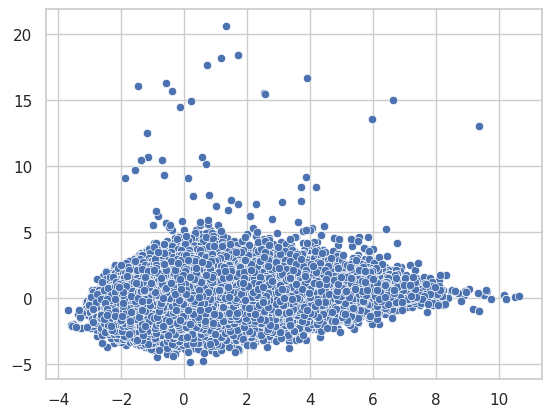

In [33]:
# plotting the reduced data
sns.scatterplot(x=reduced_data_sklearn[:,0], y=reduced_data_sklearn[:,1])

In [34]:
 #   Choose a clustering algorithm (e.g., KMeans, DBSCAN, or Hierarchical).
 #   Determine the optimal number of clusters (if needed, like in KMeans). explain how you get to that number of clusters
 #   Cluster the songs based on the reduced dimensions from PCA.
 #   Visualize the clusters and interpret any patterns. Write your interpretations

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans

sns.set()

In [36]:
max_iters=100
k = 4

In [37]:
centroids = reduced_data_sklearn[np.random.choice(df.shape[0], k, replace=False)]

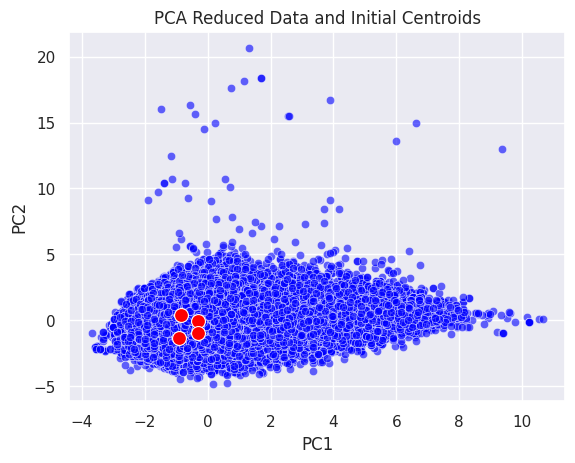

In [38]:
# Plot observations
sns.scatterplot(x=reduced_data_sklearn[:, 0], y=reduced_data_sklearn[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and Initial Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [39]:
distances = np.linalg.norm(reduced_data_sklearn - centroids[:, np.newaxis], axis=2)
labels = np.argmin(distances, axis=0)

In [40]:
new_centroids = np.array([reduced_data_sklearn[labels == i].mean(axis=0) for i in range(k)])

In [41]:
new_centroids

array([[ 1.51130641,  0.30094093],
       [ 1.04590759, -1.21630414],
       [-0.99440725,  0.97685826],
       [-1.34236369, -1.2677979 ]])

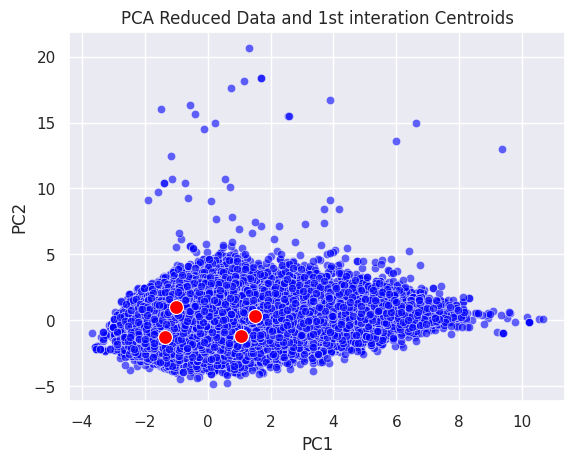

In [42]:
# Plot observations after 1st interation
sns.scatterplot(x=reduced_data_sklearn[:, 0], y=reduced_data_sklearn[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=new_centroids[:, 0], y=new_centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and 1st interation Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [43]:
def k_means_simple(data, k, max_iters=100):
    # 1. Initialize the k cluster centroids
    centroids = df[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assign each data point to the closest centroid
        distances = np.linalg.norm(df - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # 3. Recompute the centroids
        new_centroids = np.array([df[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [44]:
from sklearn.cluster import KMeans

# Assuming reduced_data_sklearn is already defined
kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data_sklearn)

final_centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centroids:\n", final_centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centroids:
 [[-0.56600632  1.22129583]
 [-0.81748741 -0.82260681]
 [ 2.74964166 -0.26491823]]


In [45]:
kmeans_n = 4
clusterer = KMeans(n_clusters=kmeans_n)

In [46]:
Sum_of_squared_distances = []

K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, n_init = "auto")
    km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)

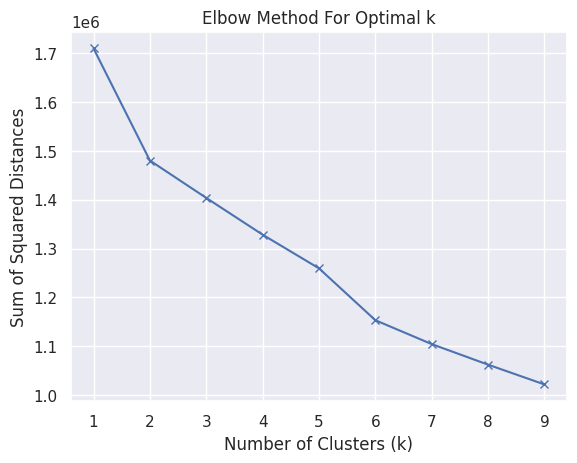

In [47]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [48]:
!pip install umap-learn -q


In [49]:
import umap

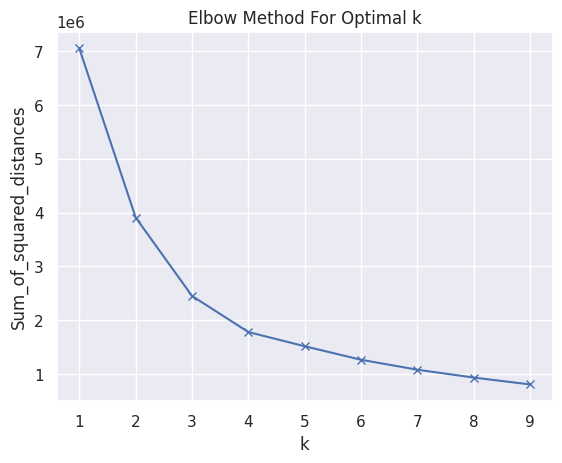

In [50]:
umap_scaler = umap.UMAP(n_components=2)
embeddings = umap_scaler.fit_transform(df_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(embeddings)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
clusterer.fit(reduced_data_sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [52]:
df['cluster'] = clusterer.labels_

df.groupby('cluster').popularity.mean()

cluster
0    34.176121
1    33.135706
2    27.538586
3    33.801346
Name: popularity, dtype: float64

In [53]:
df.groupby('cluster').tempo.mean()

cluster
0    122.184856
1    134.957127
2    103.794876
3    112.373694
Name: tempo, dtype: float64

In [54]:
df.groupby('cluster').danceability.mean()

cluster
0    0.677628
1    0.480827
2    0.337269
3    0.573181
Name: danceability, dtype: float64

In [55]:
df.groupby('cluster').energy.mean()

cluster
0    0.754772
1    0.801271
2    0.183428
3    0.414665
Name: energy, dtype: float64

In [56]:
show_data = pd.DataFrame(embeddings, columns=['x', 'y'])
show_data['track_genre'] = df['track_genre']
show_data['cluster'] = df['cluster']
show_data['duration_ms'] = df['duration_ms']


In [57]:
!pip install altair vega_datasets
!pip install altair_viewer

In [58]:
import altair as alt

In [59]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [60]:
# Create the Altair chart
chart = alt.Chart(show_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['track_genre', 'duration_ms'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2'))
).interactive()

chart

Output hidden; open in https://colab.research.google.com to view.

# Part 3

## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

Build the Recommender:

  Create a function that takes a song name as input and outputs a list of songs recommended based on textual similarity. For this, you'll use the cosine similarity scores.

In [61]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [62]:
# Refine the Textual Data: Consider merging multiple textual columns (e.g., artist name + track name) to generate recommendations based on combined textual data.

df['merged_text'] = df['artists'] + " " + df['track_name'] + " " + df['track_genre']
df['merged_text'].head(5)

0                         Gen Hoshino Comedy acoustic
1              Ben Woodward Ghost - Acoustic acoustic
2      Ingrid Michaelson;ZAYN To Begin Again acoustic
3    Kina Grannis Can't Help Falling In Love acoustic
4                   Chord Overstreet Hold On acoustic
Name: merged_text, dtype: object

In [63]:
# selected_artists = df[['merged_text','popularity','energy']].reset_index(drop=True)
selected_artists = df[['popularity','energy']].reset_index(drop=True)

In [66]:
import scipy.sparse as ss
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_distances

In [68]:
###################################################
#   Step 1: Label Encoding and Matrix Creation    #
###################################################
# Initialize label encoders
le_popularity = LabelEncoder()
le_energy = LabelEncoder()
# Label encode usernames and place slugs
selected_artists['popularity_le'] = le_popularity.fit_transform(selected_artists['popularity'])
selected_artists['energy_le'] = le_energy.fit_transform(selected_artists['energy'])

# Create a sparse matrix
# Create an array of ones, with length equal to the number of rows in the DataFrame
ones = np.ones(len(selected_artists), np.uint64)
# Create the sparse matrix using the 'username_id' and 'place_slug_id' columns as indices
matrix = ss.coo_matrix((ones, (selected_artists['popularity_le'], selected_artists['energy_le'])))

In [69]:
matrix.shape

(101, 2083)

In [72]:
type(matrix)

scipy.sparse._coo.coo_matrix

In [73]:
###################################################
#    Step 2: Perform Dimensionality Reduction     #
###################################################
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
#These latent features could potentially capture characteristics like how popular a place is
matrix_spotify = svd.fit_transform(matrix.T)



In [74]:
###################################################
#    Step 3: Calculate The Similarity Matrix      #
###################################################
cosine_distance_matrix_spotify = cosine_distances(matrix_spotify)

In [75]:
cosine_distance_matrix_spotify.shape

(2083, 2083)

In [76]:
cosine_distance_matrix_spotify

array([[0.        , 0.12183491, 0.31434076, ..., 0.17201787, 0.16846719,
        0.1353527 ],
       [0.12183491, 0.        , 0.40441347, ..., 0.23484135, 0.20722764,
        0.00944226],
       [0.31434076, 0.40441347, 0.        , ..., 0.64220892, 0.59821945,
        0.40015119],
       ...,
       [0.17201787, 0.23484135, 0.64220892, ..., 0.        , 0.01166341,
        0.22471869],
       [0.16846719, 0.20722764, 0.59821945, ..., 0.01166341, 0.        ,
        0.21229737],
       [0.1353527 , 0.00944226, 0.40015119, ..., 0.22471869, 0.21229737,
        0.        ]])

In [82]:
# Filtering by Additional Features: How might you modify the recommender to suggest only songs from a particular genre or only non-explicit songs?

# Compute the pairwise Euclidean distance between each pair of artists
# distance_matrix = euclidean_distances(selected_artists[['popularity', 'energy']])
euclidean_matrix = euclidean_distances(cosine_distance_matrix_spotify)
euclidean_matrix.shape

(2083, 2083)

In [83]:
euclidean_matrix

array([[ 0.        ,  5.05270409, 13.10942927, ..., 11.21626671,
        12.12543496,  5.24836094],
       [ 5.05270409,  0.        , 13.26255319, ..., 12.33572377,
        12.91476369,  1.09406628],
       [13.10942927, 13.26255319,  0.        , ..., 19.70787451,
        19.77449933, 13.34681208],
       ...,
       [11.21626671, 12.33572377, 19.70787451, ...,  0.        ,
         2.10336975, 12.26625026],
       [12.12543496, 12.91476369, 19.77449933, ...,  2.10336975,
         0.        , 12.86922904],
       [ 5.24836094,  1.09406628, 13.34681208, ..., 12.26625026,
        12.86922904,  0.        ]])

In [87]:
# # Create a DataFrame for better visualization
# euclidean_matrix_df = pd.DataFrame(euclidean_matrix, index=selected_artists['popularity'], columns=selected_artists['popularity'])
# euclidean_matrix_df = euclidean_matrix_df.round(2)
# print(euclidean_matrix_df)

# # Create a DataFrame for better visualization
# euclidean_matrix_df = pd.DataFrame(euclidean_matrix, index=selected_artists.index, columns=selected_artists.index)
# euclidean_matrix_df = euclidean_matrix_df.round(2)

# # Print the Euclidean distance matrix
# print(euclidean_matrix_df)

import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Create a DataFrame with only the Euclidean matrix as data
euclidean_matrix_df = pd.DataFrame(euclidean_matrix)
euclidean_matrix_df = euclidean_matrix_df.round(2)

# Print the Euclidean distance matrix
print(euclidean_matrix_df)


       0      1      2      3      4      5      6      7      8      9     \
0      0.00   5.05  13.11  22.80   6.64   2.85  11.54  28.53  14.10   9.61   
1      5.05   0.00  13.26  23.27   5.32   7.32  10.24  28.97  11.66   6.81   
2     13.11  13.26   0.00  23.97   9.53  12.59   4.93  27.02   7.20   8.46   
3     22.80  23.27  23.97   0.00  23.16  22.97  23.68  10.69  24.37  23.24   
4      6.64   5.32   9.53  23.16   0.00   8.23   6.18  29.06   9.63   4.02   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2078  17.27  17.85  22.46   7.91  18.80  17.90  21.22  16.96  22.51  19.74   
2079  20.44  21.17  23.72   4.00  21.70  20.67  23.14  13.02  24.08  22.23   
2080  11.22  12.34  19.71  14.34  14.08  12.13  17.96  22.21  19.91  15.92   
2081  12.13  12.91  19.77  13.28  14.23  13.24  17.97  21.78  19.91  15.95   
2082   5.25   1.09  13.35  23.31   5.10   7.50  10.09  29.16  11.80   6.70   

      ...   2073   2074   2075   2076   2077   2078   2079   20

In [88]:
euclidean_matrix_df.shape

(2083, 2083)

In [89]:
import numpy as np

In [91]:
np.argsort(euclidean_matrix[0,:])[:3]

array([  0,  31, 284])

In [94]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'cluster', 'merged_text'],
      dtype='object')

In [93]:
df_rg = df.copy()

In [97]:
df_rg.drop(columns='Unnamed: 0', inplace=True)
df_rg.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,merged_text
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0,Gen Hoshino Comedy acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2,Ben Woodward Ghost - Acoustic acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3,Ingrid Michaelson;ZAYN To Begin Again acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2,Kina Grannis Can't Help Falling In Love acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3,Chord Overstreet Hold On acoustic


In [98]:
ixs = np.argsort(euclidean_matrix[588,:])[:10]
print(df_rg['artists'][ixs])

588                   Trevor Hall
329                  Zack Tabudlo
515             Masaharu Fukuyama
234                Ray LaMontagne
303                       Lusaint
1120                 BaianaSystem
445                 Mischief Brew
290     Allman Brown;Liz Lawrence
480                The Civil Wars
265                  Roses & Frey
Name: artists, dtype: object


In [102]:
df_rg['artists'][:3,]

0               Gen Hoshino
1              Ben Woodward
2    Ingrid Michaelson;ZAYN
Name: artists, dtype: object

In [103]:
df_rg[df_rg['artists'] == 'Trevor Hall']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,merged_text
588,0c7iF5fSBYxCuwsAv2z4iI,Trevor Hall,Chapter Of The Forest,Green Mountain State,61,274632,False,0.693,0.367,3,...,0.0323,0.351,0.000029,0.111,0.286,129.879,4,acoustic,3,Trevor Hall Green Mountain State acoustic


In [117]:
# def recommender_artists(artist_name, n_recs):
#     if artist_name in df_rg['artists'].values:
#         ix = df_rg[df_rg['artists'] == artist_name].index[0]
#         ixs = np.argsort(euclidean_matrix[ix, :])[:n_recs]
#         return df_rg['artists'][ixs]
#     else:
#         return 'Artist not in the dataset'

def recommender_artists(artist_name, n_recs):
    if artist_name in df_rg['artists'].values:
        ix = df_rg[df_rg['artists'] == artist_name].index[0]
        ixs = np.argsort(euclidean_matrix[ix, :])[:n_recs]
        recommendations = df_rg['artists'][ixs]
        unique_recommendations = recommendations[~recommendations.isin([artist_name])]
        return unique_recommendations.tolist()
    else:
        return 'Artist not in the dataset'


In [119]:
recommender_artists('Trevor Hall', 6)

['Zack Tabudlo',
 'Masaharu Fukuyama',
 'Ray LaMontagne',
 'Lusaint',
 'BaianaSystem']

In [112]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.4 MB/s eta 0:

In [113]:
import gradio as gr

In [120]:
demo = gr.Interface(fn=recommender_artists,
                    inputs=[
                        gr.Dropdown(
                            df_rg['artists'].tolist(),
                            label="Artists that I liked!",
                            info="Pick one!"
                        ),
                        gr.Slider(
                            1, 15, 5, step=1,
                            label="Number of recommendations"
                        )
                    ],
                    outputs="text")

In [122]:
demo.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>